In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from glob import glob
import random, os, datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import tensorflow as tf
from tensorflow.keras import layers, metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras.metrics import Accuracy, AUC

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

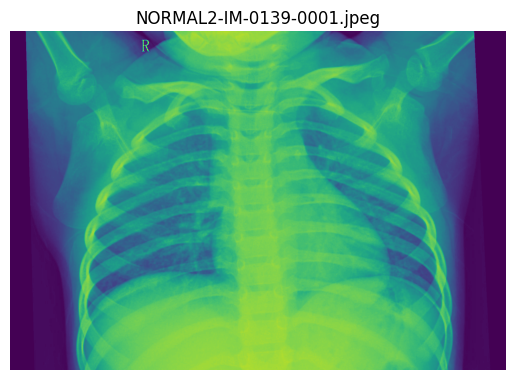

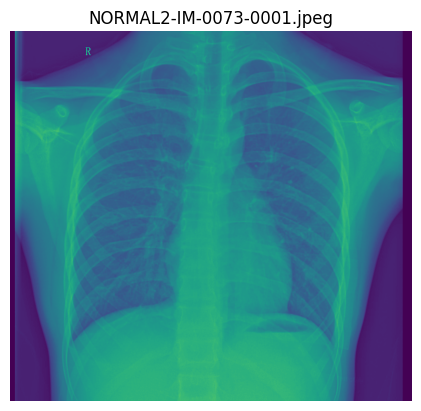

In [5]:
image_files = os.listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL')

for i, file in enumerate(image_files[:2]):  
    img = mpimg.imread(os.path.join('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL', file))
    plt.figure()
    plt.imshow(img)
    plt.title(file)
    plt.axis('off')  
    plt.show()

In [6]:
train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,        
    rotation_range=40,        
    width_shift_range=0.2,   
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           %
    horizontal_flip=True,     
    fill_mode='nearest'       
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train',  
    target_size=(224, 224),   # Resize images to the desired size (adjustable)
    class_mode='binary',       # Binary classification (adjust for multi-class)
    batch_size=10
)

# Load and normalize the testing data without augmentation
validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test',   # Path to your test directory
    target_size=(224, 224),   # Resize images to the same size
    class_mode='binary',       # Adjust for your classification task
    batch_size=4
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


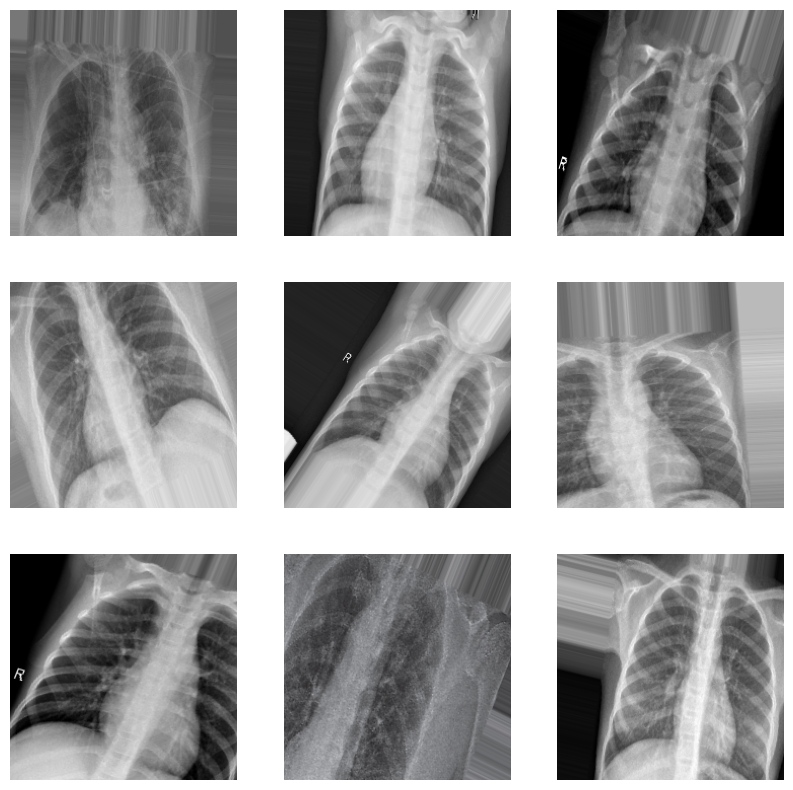

In [9]:
import matplotlib.pyplot as plt

augmented_images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 augmented images
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

In [13]:
# cnn = tf.keras.models.Sequential()
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu') )
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Input(shape=[224, 224, 3]))

# Diğer katmanları eklemeye devam ediyoruz
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Assuming you have a model named 'model'
history = cnn.fit(
    train_generator,
    epochs=30,           # Number of epochs (adjustable)
    validation_data=validation_generator )

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 490ms/step - accuracy: 0.8439 - loss: 0.4221 - val_accuracy: 0.9750 - val_loss: 0.1737
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.8301 - loss: 0.4015 - val_accuracy: 0.9750 - val_loss: 0.2021
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.8057 - loss: 0.5145 - val_accuracy: 0.9500 - val_loss: 0.2161
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step - accuracy: 0.8320 - loss: 0.3853 - val_accuracy: 0.9750 - val_loss: 0.0801
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - accuracy: 0.8055 - loss: 0.3941 - val_accuracy: 0.9750 - val_loss: 0.2055
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 467ms/step - accuracy: 0.8553 - loss: 0.4282 - val_accuracy: 0.9750 - val_loss: 0.1364
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.8408 - loss: 0.3857 - val_accuracy: 0.9250 - val_loss: 0.1486
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 513ms/step - accuracy: 0.8164 - loss: 0.3406 - val_accu